In [1]:
import sys
sys.path.append('../')
from read_data_functions import *
from plot_functions import *
from calculations import *
from grouping import *
plt.style.use('../Style.mplstyle')
import warnings
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None  # suppress warnings

In [2]:
path = '../../../Data/2026/260113_Vanillin_gas_particle_UV/'
SMPS = import_SMPS(f'{path}SMPS/', '', 0)
save_path = 'Figures/260113_vanillin(aq)_RH20/'
timestamps = [['2026-01-13 13:21', '2026-01-13 18:25']]

for key in SMPS.keys():
    SMPS[key].rename(columns = {SMPS[key].keys()[38]:'Total concentration'}, inplace = True)
AMS = import_data(f'{path}AMS/', '', 't_series', '%d-%m-%Y %H:%M:%S', 0)
for key in AMS.keys():
    if 'PToF' not in key:            
        AMS[key].columns = ['t_series', 'HROrg', 'HRNO3', 'HRSO4', 'HRNH4', 'HRChl', 'Ratio_H_C', 'Ratio_O_C', 
                            'familyCHN', 'familyCHO1', 'familyCHO1N', 'familyCH', 'f43', 'f44', 'Time']
PTRMS = import_PTRMS(f'{path}PTRMS/', '')
PTRMS = PTRMS['260113_Vanillin+UV']

(0.0, 3.25)

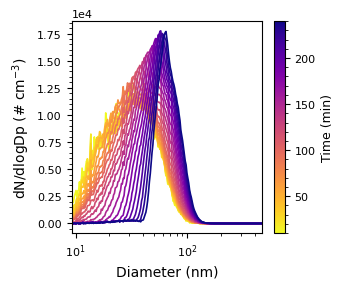

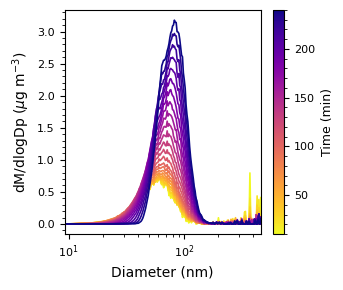

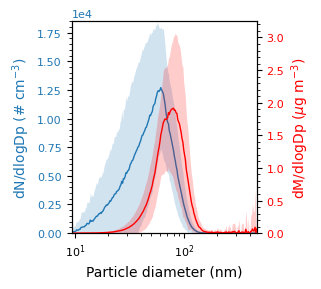

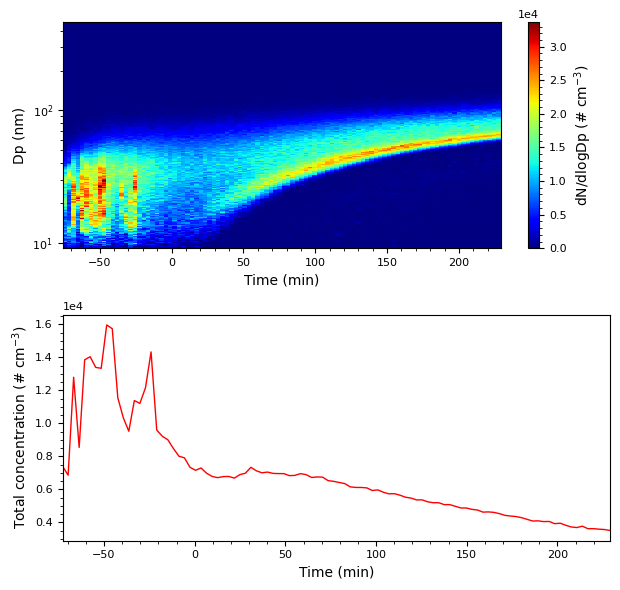

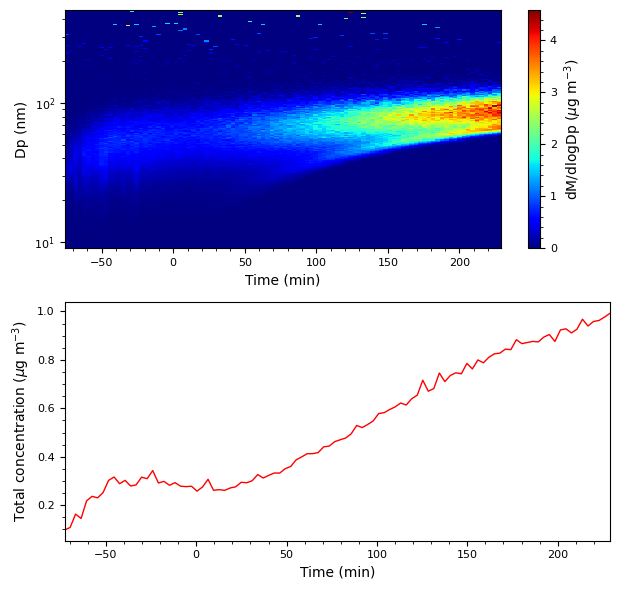

In [ ]:
SMPS_keys = [['260113-vanillin_number'], ['260113-vanillin_mass']]
ax, ax_2 = plot_SMPS(SMPS, SMPS_keys, SMPS['260113-vanillin_mass'].keys()[42:-1], 9.07, 'number and mass', timestamps, 10, 
                     'Total concentration', '2026-01-13 14:36', 1, 1, save_path)
ax[0].set_ylim(0, 1.85*10**4)
ax_2[0].set_ylim(0, 3.25)

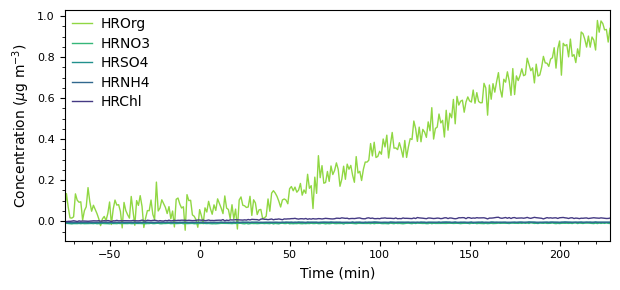

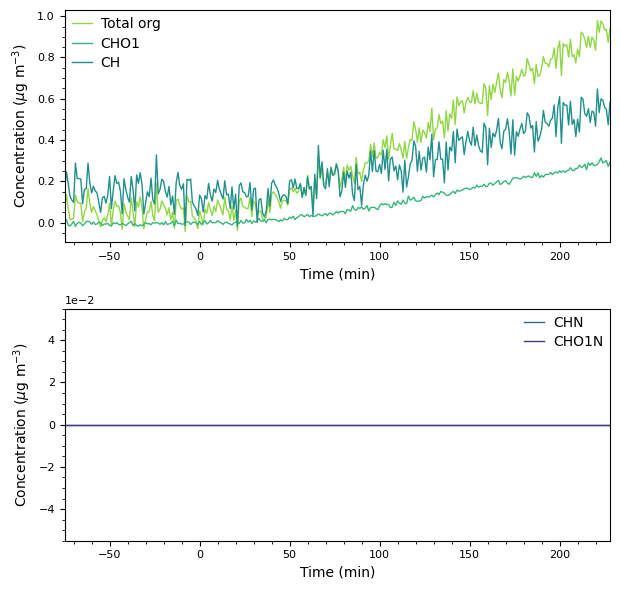

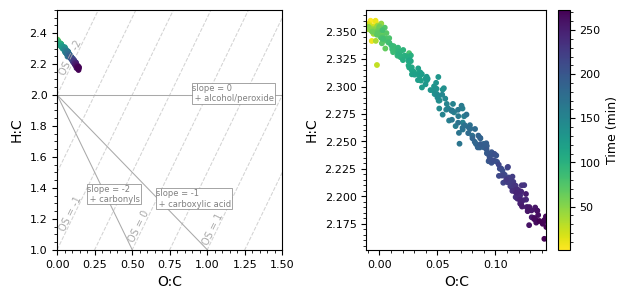

In [ ]:
bg_timestamps = ['2026-01-13 12:51', '2026-01-13 13:07']
plot_AMS(AMS['260113_AMS_vanillin+UV_TS'], None, '2026-01-13 14:36', timestamps[0], bg_timestamps, 1, save_path)

In [ ]:
# Identify concentration columns
concentration_cols = [col for col in PTRMS.columns if col.startswith('m') and '(' in col] # The name of the time series
smooth_data_array = GetData(PTRMS, concentration_cols, smooth=True, window_size=100)

# Compute Distance measures
smooth_distance_matrices = ComputeTSDistance(smooth_data_array, 'soft_dtw')

# Do clustering and plot the result
for label, d_mat in smooth_distance_matrices.items():
    hdbscan_labels= PerformHDBSCAN(d_mat)
    PlotClusterRows(smooth_data_array, concentration_cols, hdbscan_labels, f'HDBSCAN Clustering: {label}', f'{save_path}hdbscan_clusters_{label}_smooth.jpg')

HDBSCAN Labels: [ 7 -1 16  3  3  7 -1 15  4 -1 -1  6  2  2 14 15 17  4 18 17 10 -1 18 18
  4 18 11 -1 16 -1 14 -1  6 13 18 -1 15 13  5 -1 18  5 12 -1 -1 13 12 18
  1 10 -1  1 -1  8 11  8 12  8 11 -1  1  5  9  9  0  0  1  0]
HDBSCAN Labels: [10 -1 17  3  3 10 13 15  6 -1 17  7  3  3 10 15 16  6 -1 16 -1 12 16 16
 -1 16  9  7 17 13 13 -1  7 14 16 -1 -1 14  5 -1 16 -1 -1 12  0 14 -1 16
  2 -1 16  1  0 11  9 11 -1  8  9 -1  1  5  8  8  4  4  2  4]


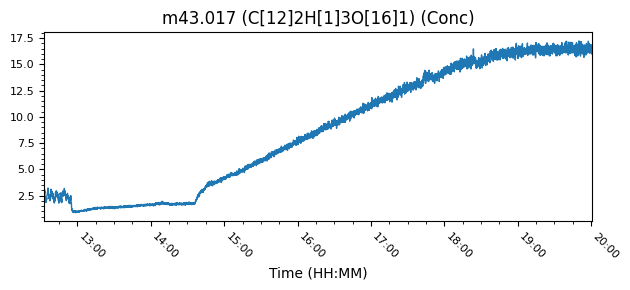

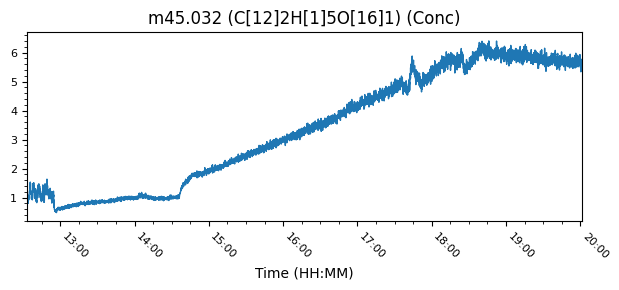

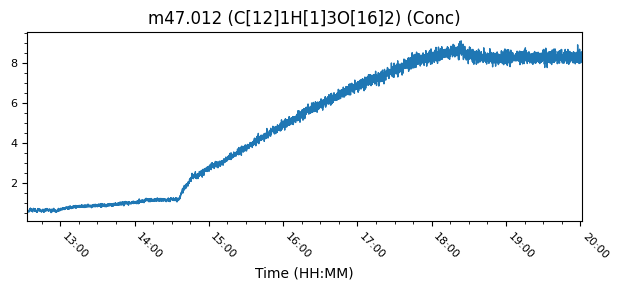

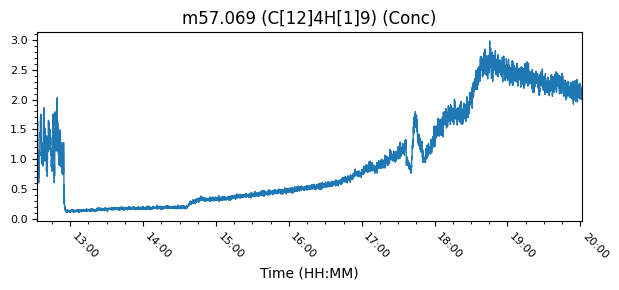

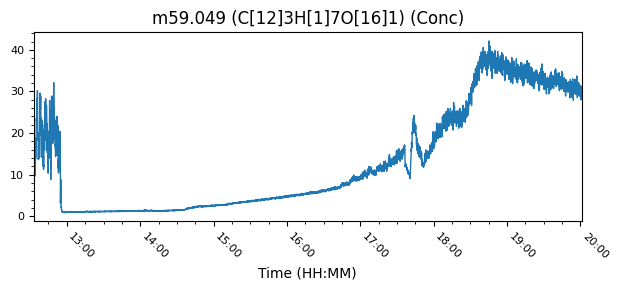

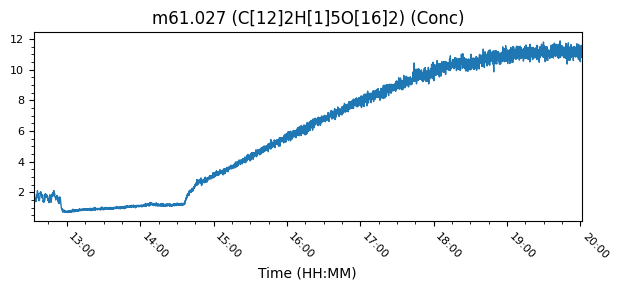

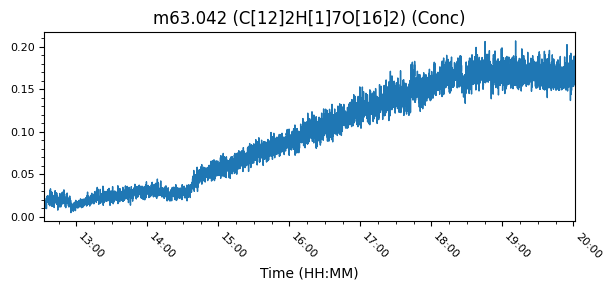

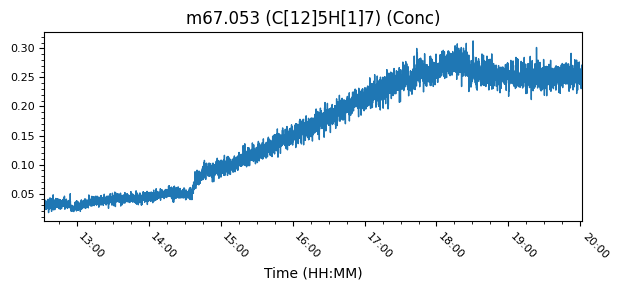

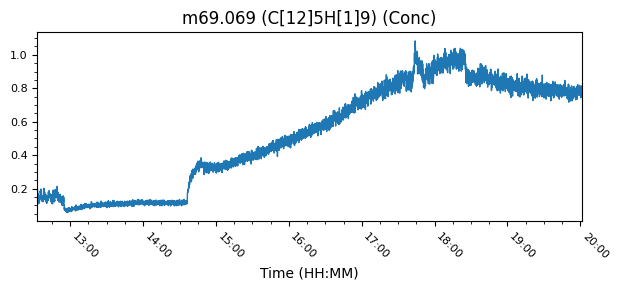

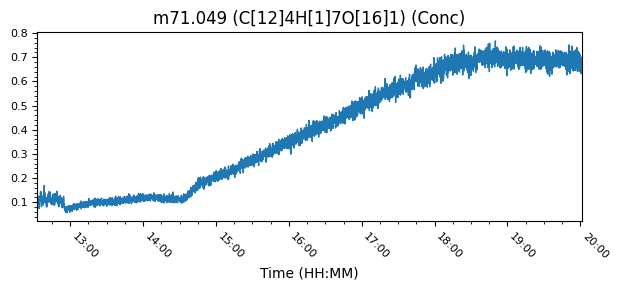

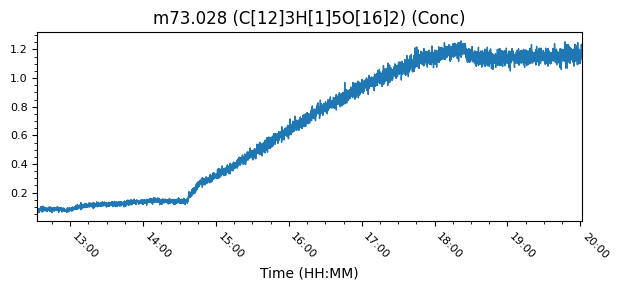

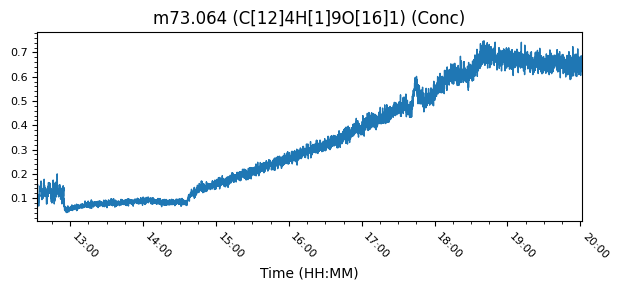

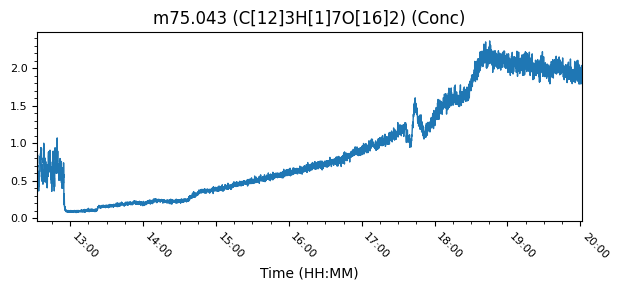

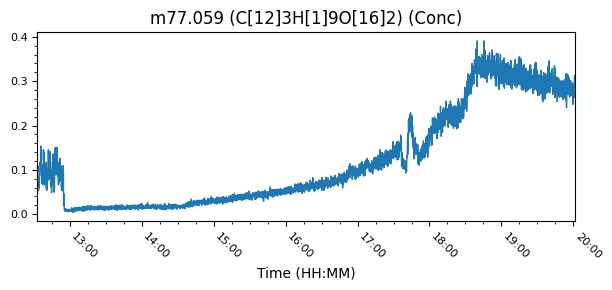

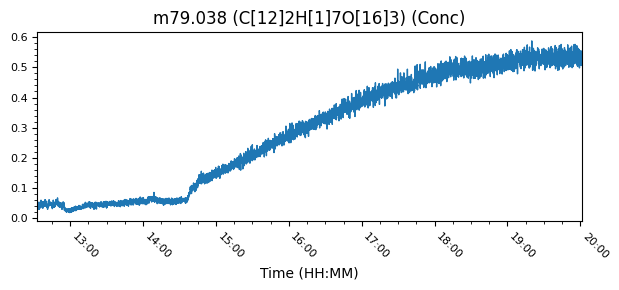

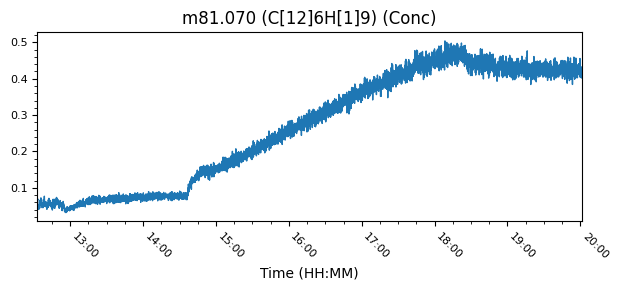

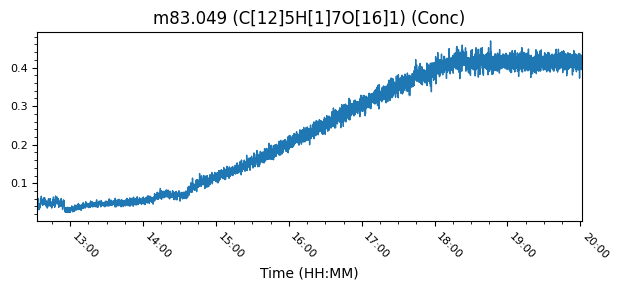

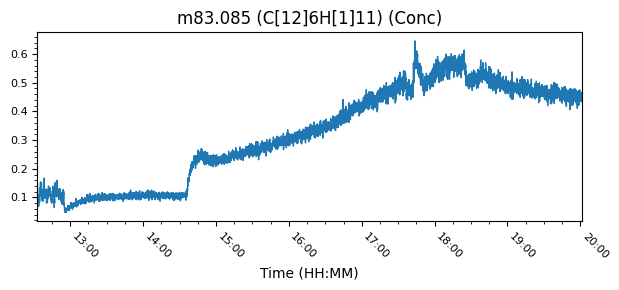

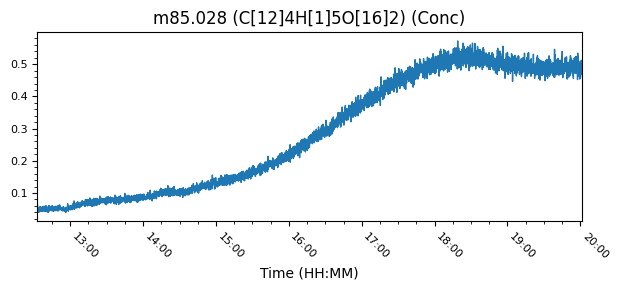

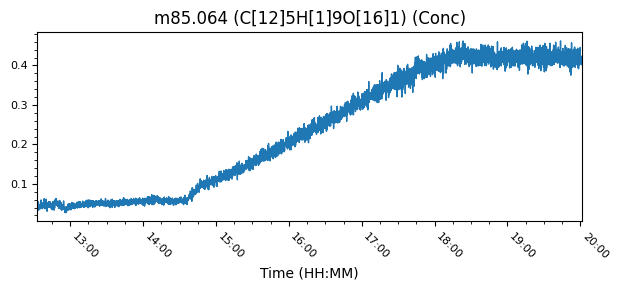

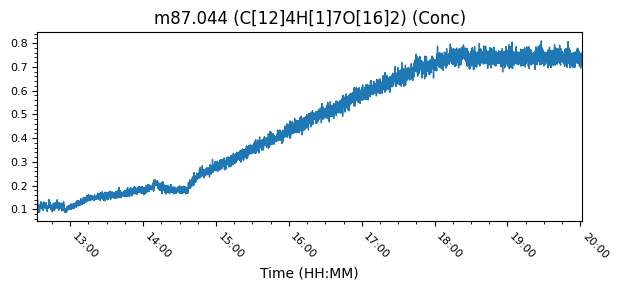

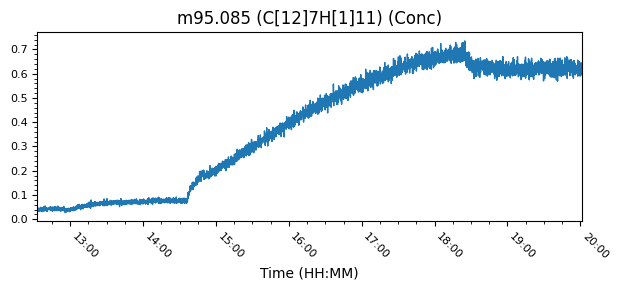

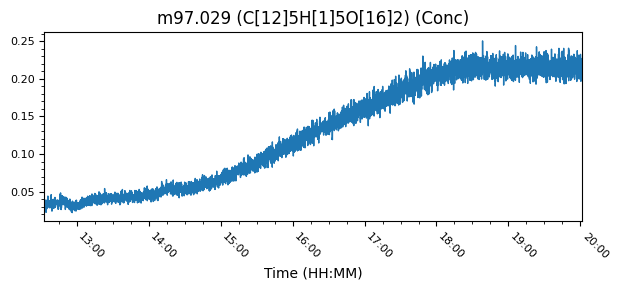

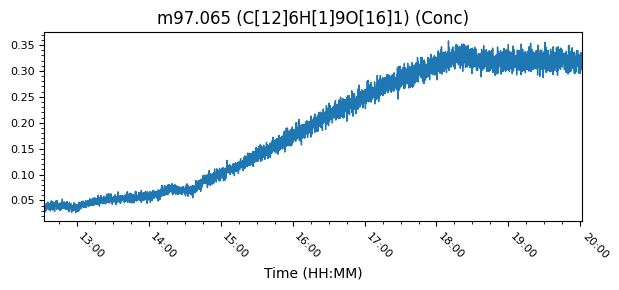

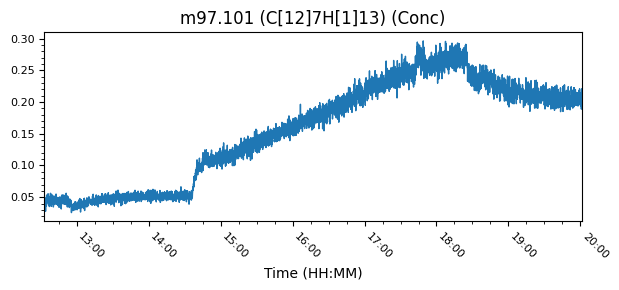

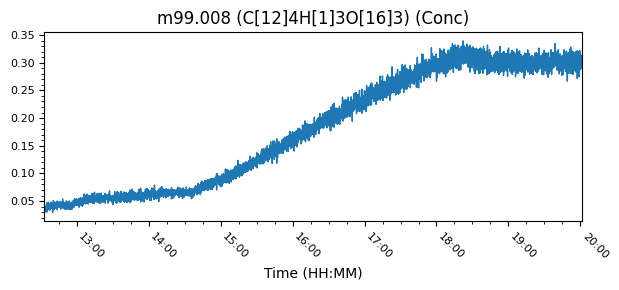

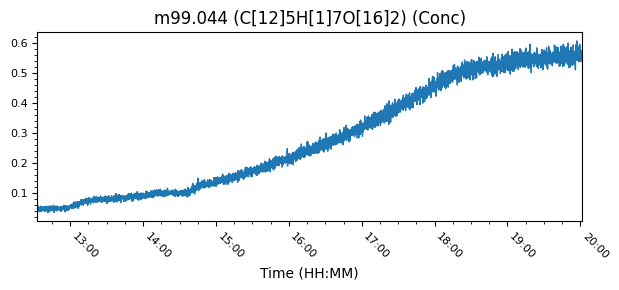

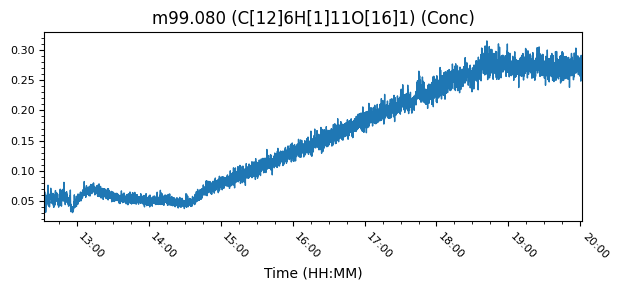

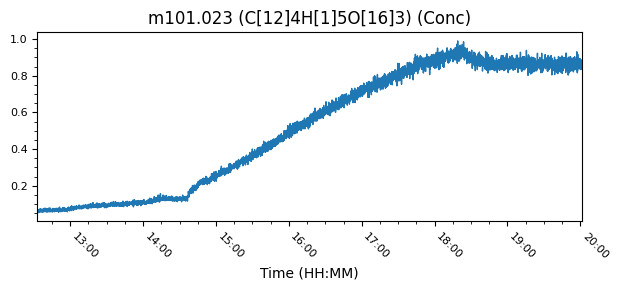

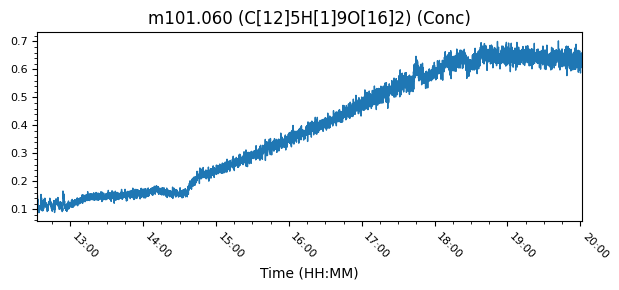

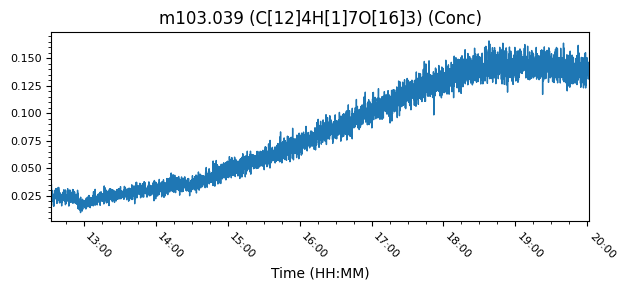

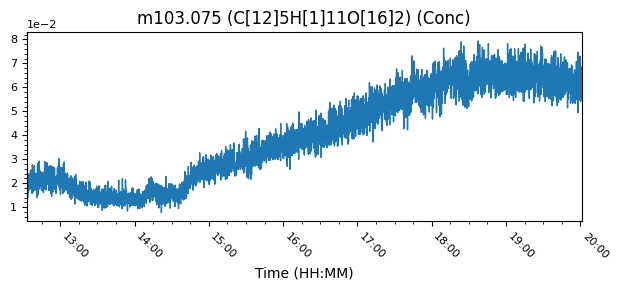

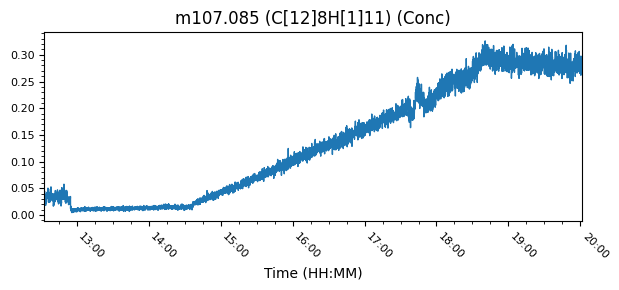

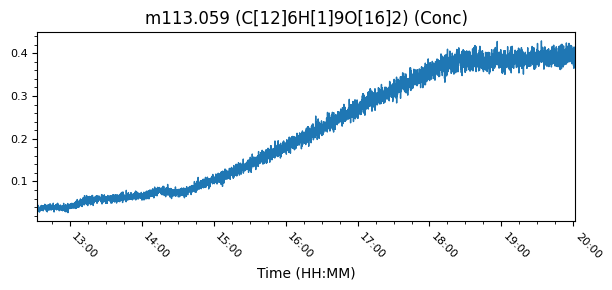

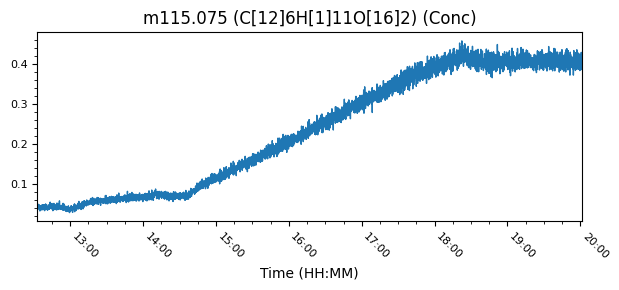

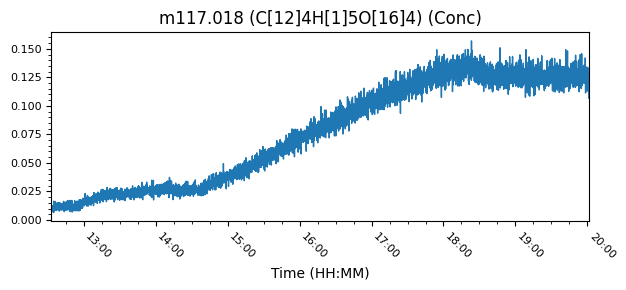

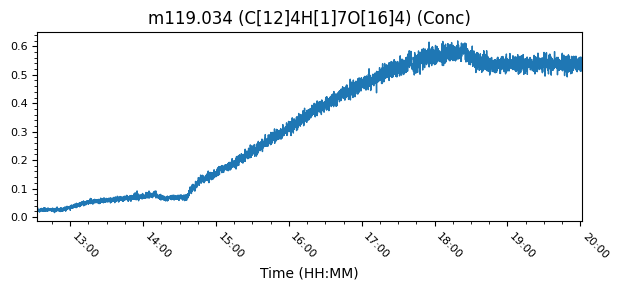

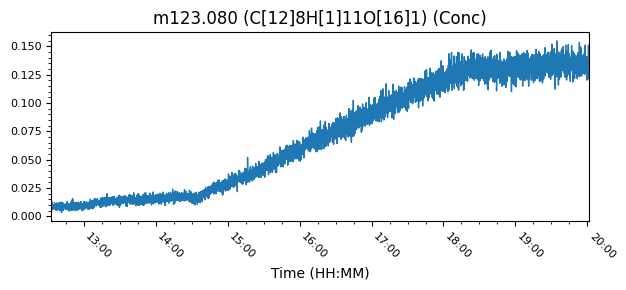

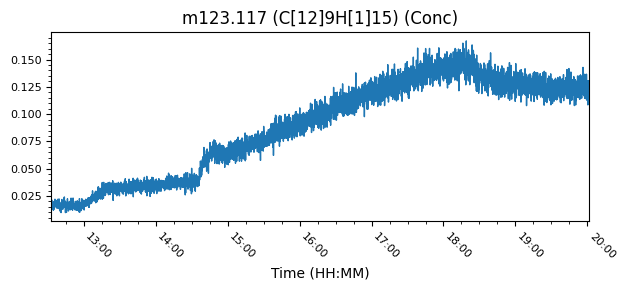

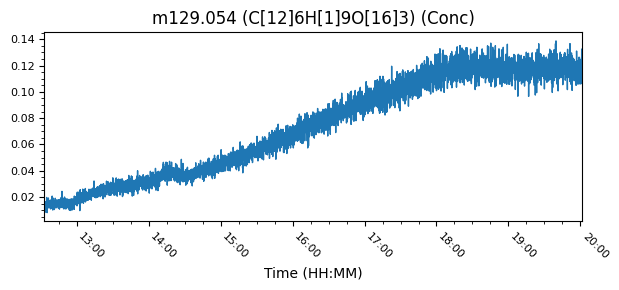

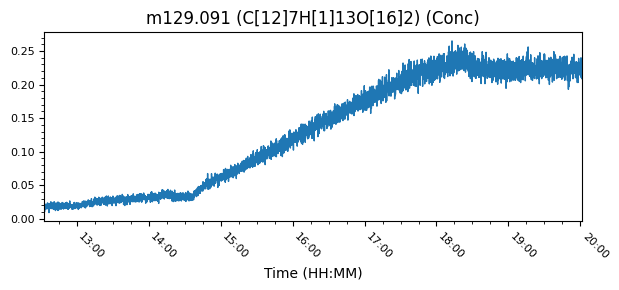

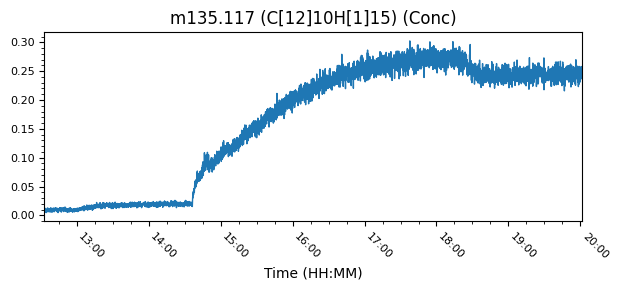

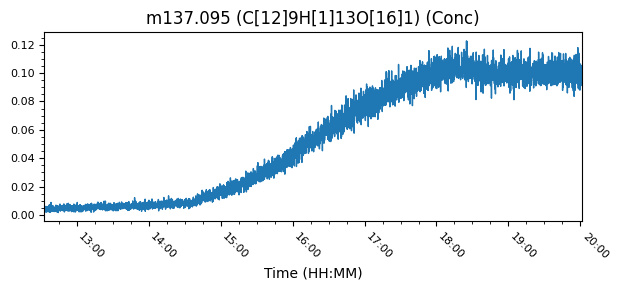

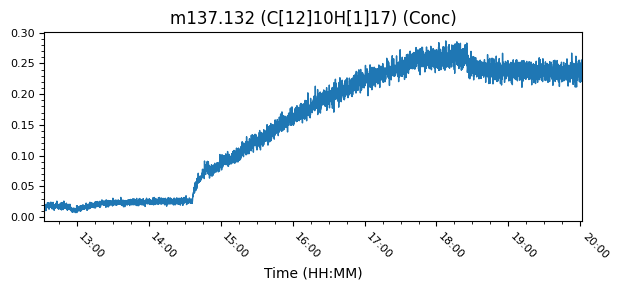

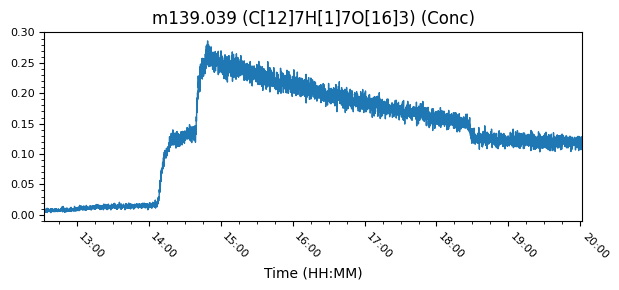

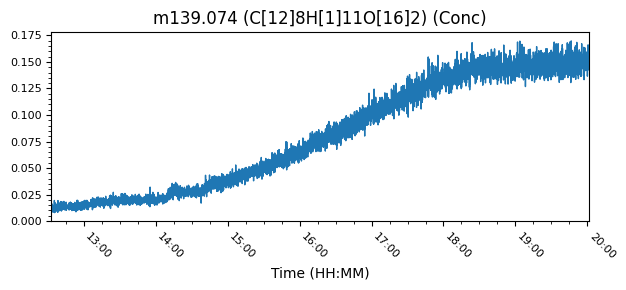

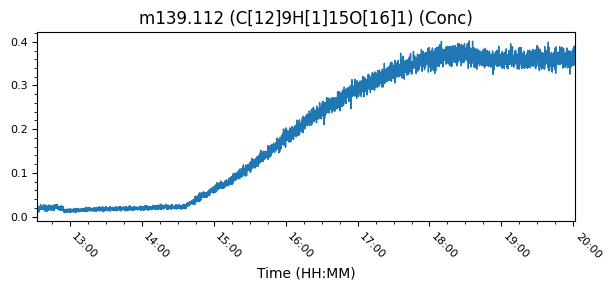

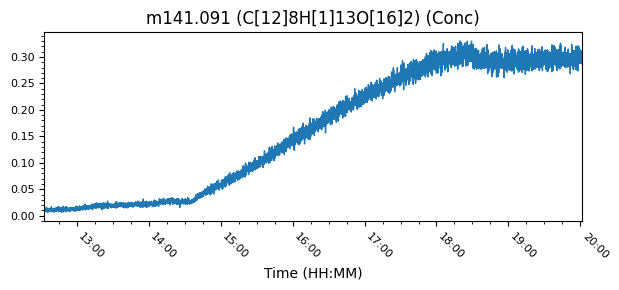

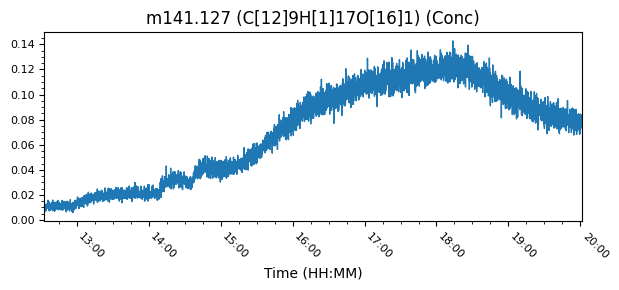

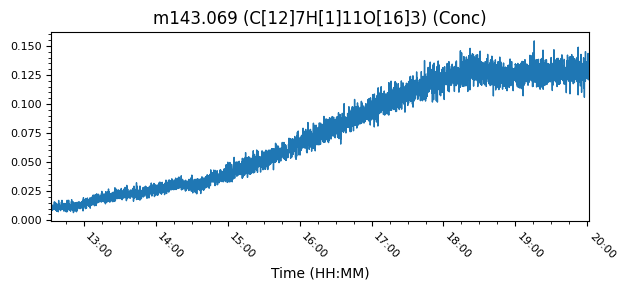

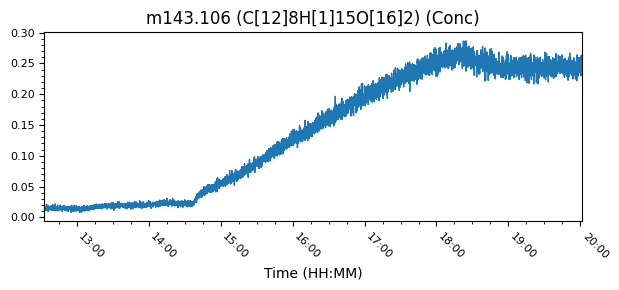

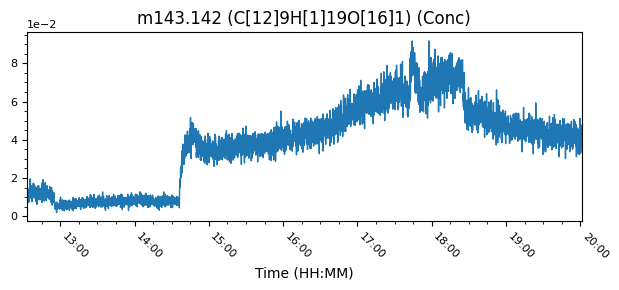

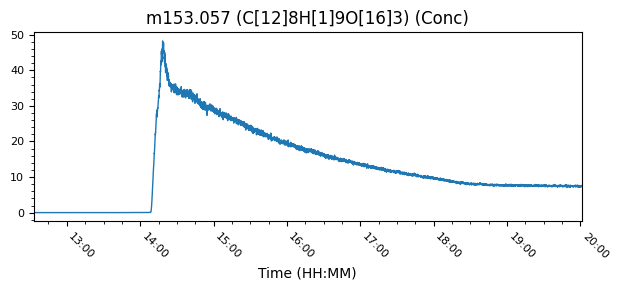

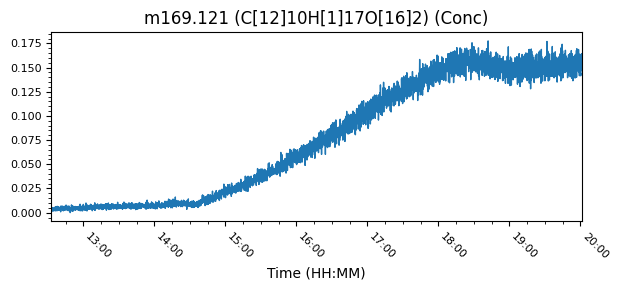

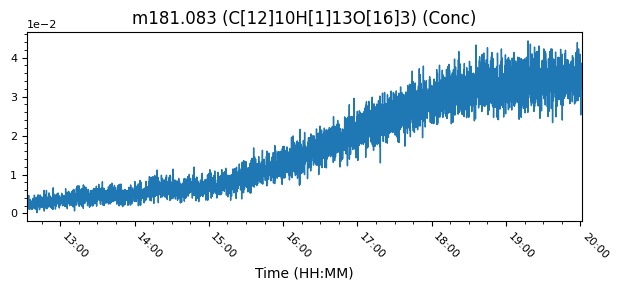

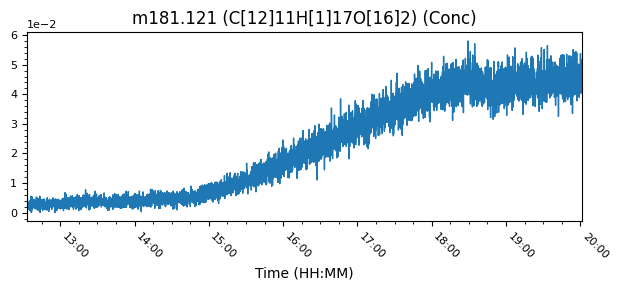

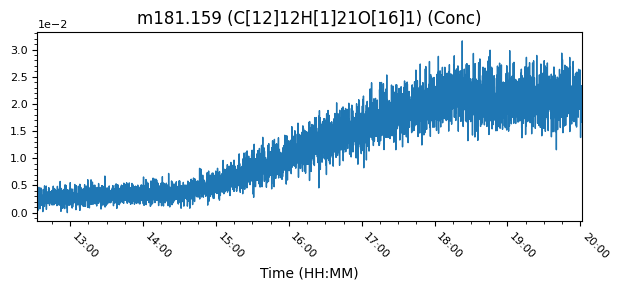

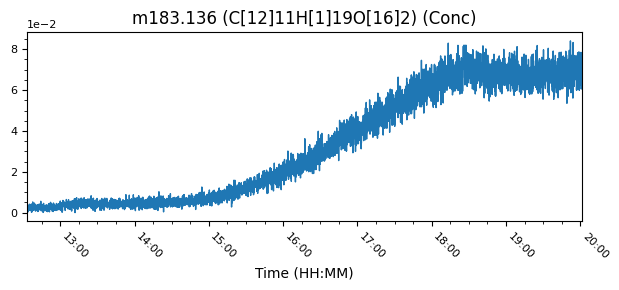

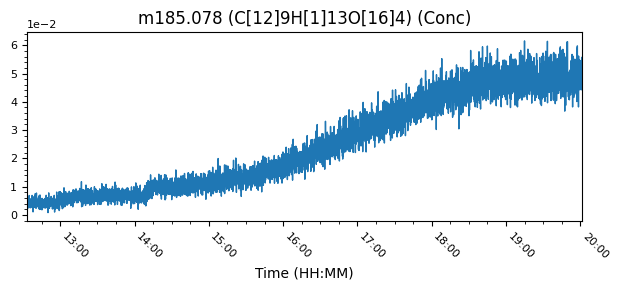

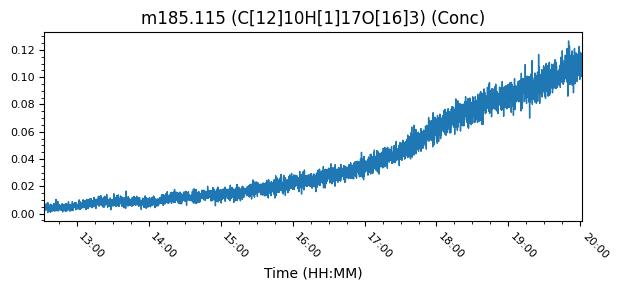

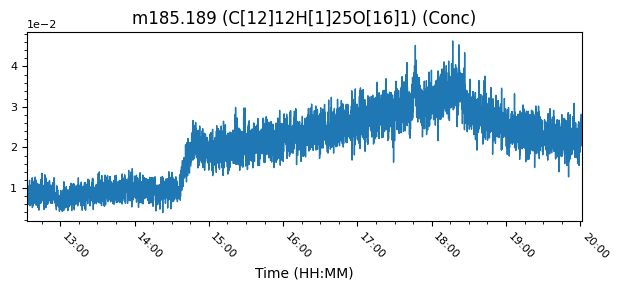

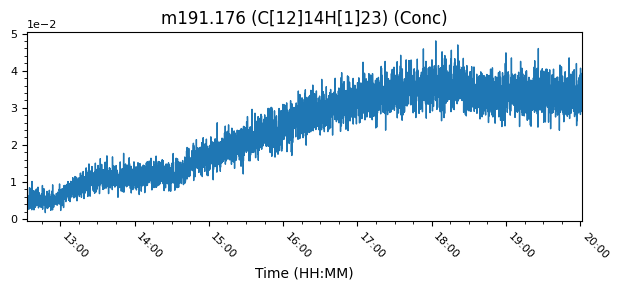

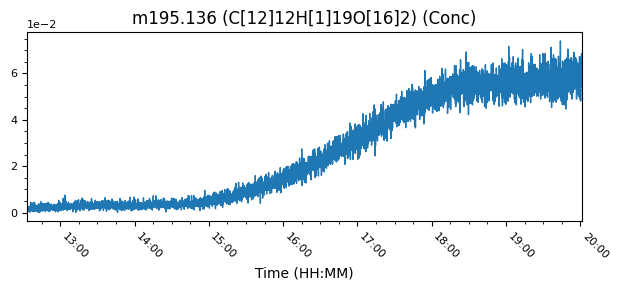

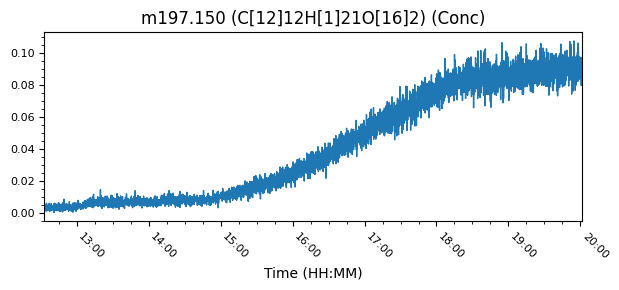

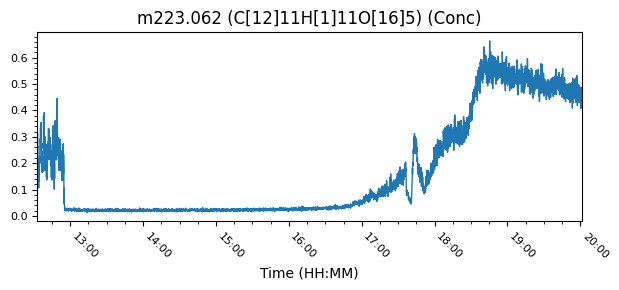

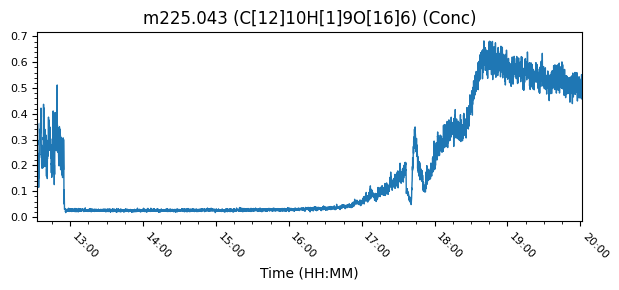

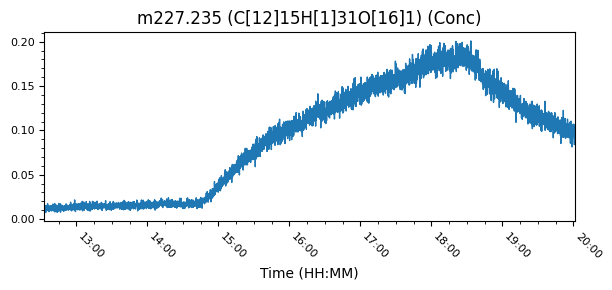

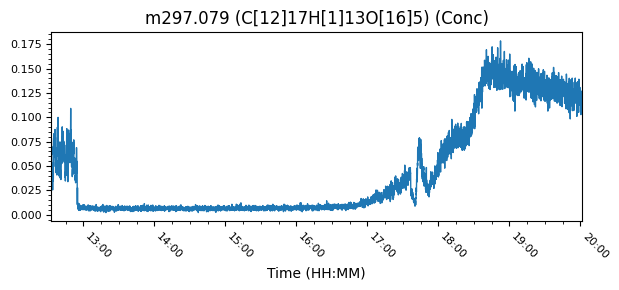

In [ ]:
for key in PTRMS.keys()[4:-2]:
    fig, ax = plt.subplots(figsize = (6.3, 3))
    plot_total(ax, PTRMS, key, None, None)
    ax.set_title(key)
    fig.tight_layout()